# Mercedes Quality Control Data

### This is a predictive analysis of Mercedes QC time-series data

The analysis will show some visulaizations to help understand what features may or may not be included in the model.  
I will create a model that predicts how long a car will be in test mode before it passes.  
Assume the column headings represent different features or options installed in the car.

Let's first import certain libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Expand the output to be able to view all columns

In [2]:
pd.options.display.max_columns = 999

Now, let's read in the training data and take a look at the first few rows

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# List the data types for each column
print(df.dtypes)

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object


Since this doesn't really show each column, I will create a dataframe that shows how many of each type.

In [83]:
#show this is a dataframe
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


For fun, I will look at correlations between different variables. Since they are all 0's or 1's, this may not help much.

In [9]:
df.corr()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,-0.027063,-0.012762,0.063216,-0.029946,-0.096610,-0.010612,-0.008972,-0.048634,0.004214,0.030967,0.004175,0.015264,-0.040157,0.013217,0.015306,-0.008026,-0.040157,0.011691,-0.040157,0.256003,0.015306,0.018588,-0.013301,-0.022712,0.020923,-0.074500,-0.026850,0.012121,-0.034911,0.017011,-0.005676,0.040512,0.035067,0.022614,0.089264,0.000675,-0.006147,0.009491,0.015347,-0.041790,-0.020662,0.029059,-0.014606,0.017056,0.023260,-0.013670,-0.026285,0.023848,0.042702,-0.015103,0.042323,-0.000156,0.050365,-0.000898,0.004978,0.024365,0.000675,-0.007273,0.043475,0.002817,-0.014986,-0.015616,-0.000391,0.020186,0.050365,-0.019790,0.005876,-0.015406,-0.003192,-0.007429,-0.004421,-0.012891,0.017239,NaN,-0.004421,-0.004699,0.047778,0.001968,0.005285,0.008990,0.023613,-0.025072,0.089264,0.036747,0.007142,0.013155,-0.034735,NaN,-0.001316,-0.004779,-0.015865,-0.012837,-0.009420,0.017011,0.047947,-0.017450,0.003014,0.027489,0.002249,0.002249,-0.022614,-0.003192,0.005643,0.006030,-0.007121,0.061431,-0.002184,-0.008170,-0.005676,0.008170,-0.037022,0.034093,-0.063950,0.017011,0.009187,-0.000675,-0.026913,-0.005909,-0.082273,-0.005098,-0.011025,0.002397,-0.044740,0.078314,0.006902,-0.005909,0.017011,0.029152,0.038799,-0.024079,-0.019254,0.003737,-0.008364,0.040947,-0.002179,0.002179,-0.002397,-0.037332,-0.022460,-0.008401,-0.001761,0.016592,-0.010831,-0.011175,0.014766,0.000706,0.001100,-0.037129,-0.000541,0.001510,0.017056,-0.022592,0.010596,-0.032519,-0.074582,0.026306,0.033728,0.009718,0.030096,-0.022941,0.019076,-0.017838,-0.023849,0.030359,0.029084,-0.029660,-0.008905,0.004997,-0.037283,0.019787,-0.029084,-0.006429,-0.011499,0.039634,0.013077,-0.009420,0.002252,-0.038345,-0.010981,-0.007754,-0.026602,0.026602,0.000297,0.022472,0.004107,0.023971,-0.012257,-0.010038,-0.003335,0.042702,0.089264,-0.012556,0.017056,-0.003988,-0.008044,0.040697,0.016666,-0.000461,0.017011,-0.007054,-0.002038,0.014475,-0.019254,-0.007121,0.003242,-0.000097,-0.026012,0.016960,0.004175,NaN,-0.062625,NaN,-0.032544,-0.052728,-0.028826,0.089264,-0.063217,0.049119,-0.004421,-0.003192,0.050365,-0.007429,-0.016100,-0.010981,0.029059,-0.005186,0.030320,-0.037718,

Hmm. column 'X11' looks like all zeros. All varibles have some slight correlation to 'Y'.

I will create a function that looks for columns that sum to zero and remove those from analysis.

In [84]:
for i in df.columns:
    if df[i].dtype in ['float64' , 'int64']:
        if df[i].var()==0:
            df.drop(i,axis=1,inplace=True)
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(4209, 366)

Now, I'll import Tensorflow and start doing some initial predictions after training a model.

In [5]:
import tensorflow as tf
from tensorflow import keras


In [80]:
print(tf.__version__)

2.0.0-alpha0


First, let's continue wrangling the data and use label-encoder and one-hot encoding to convert categorical column data to numerical data.

In [6]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [85]:
df_clean = df

In [68]:
df_clean.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_clean['X0']= le.fit_transform(df_clean['X0'])
df_clean['X1']= le.fit_transform(df_clean['X1'])
df_clean['X2']= le.fit_transform(df_clean['X2'])
df_clean['X3']= le.fit_transform(df_clean['X3'])
df_clean['X4']= le.fit_transform(df_clean['X4'])
df_clean['X5']= le.fit_transform(df_clean['X5'])
df_clean['X6']= le.fit_transform(df_clean['X6'])
df_clean['X8']= le.fit_transform(df_clean['X8'])
df_clean.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Visula inspection that encoding worked
df_clean.X8.unique()

array([14, 23,  4, 13, 18,  0,  7, 15, 12, 10,  3,  8, 21,  9,  1, 16, 22,
        6, 24, 11,  5, 20, 17, 19,  2], dtype=int64)

Splitting the dataset into training and validation sets, along with splitting the target variable, y


In [152]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_clean, df_clean.y,
#                                                    test_size=0.1,
#                                                    random_state=0)

Print the final shape of both datasets to make sure they split evenly

In [155]:
#X_train.shape, X_test.shape

((3788, 364), (421, 364))

Inspect some of the data for Gausian distributions since it will need to be for Linera Regression. If not, we will have to apply logrithmic sclaing.

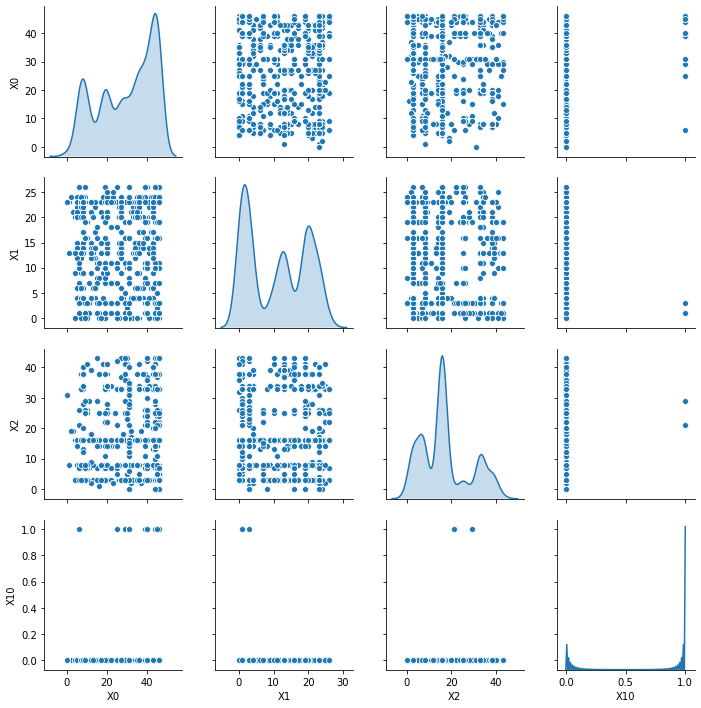

In [13]:
sns.pairplot(df_clean[["X0", 'X1', 'X2', 'X10']], diag_kind="kde")

I will create the model without normalizing since all the values are quite small.

### Build the Model

In [118]:
# I will create a Callback to stop training at a certain point as to avoid over-fitting.   
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<5.5):
            print("\nReached desired accuracy so cancelling training!")
            self.model.stop_training = True

data = df_clean            
# Splitting the dataset for training and validation            
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.y,
                                                    test_size=0.1, random_state=0)
X_training = X_train.drop(['y', 'ID'], axis=1)
X_val = X_test.drop(['y', 'ID'], axis=1)

callbacks = myCallback()

#Designing the model utilizing Tensorflow.
model = keras.Sequential([
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=[len(X_train.keys())]),
    #tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(X_training.keys())]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)])
    
# Complile the model
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer= optimizer,
          loss='mse',
          metrics=['mse', 'mae'])
# Fit the mode
history = model.fit(X_training, y_train, epochs=200, verbose=1.0, callbacks=[callbacks])

Epoch 1/200
3788/3788 [==============================] - 0s 91us/sample - loss: 815.5495 - mse: 815.5496 - mae: 18.6610
Epoch 2/200
3788/3788 [==============================] - 0s 56us/sample - loss: 112.1877 - mse: 112.1877 - mae: 7.7491
Epoch 3/200
3788/3788 [==============================] - 0s 58us/sample - loss: 93.8567 - mse: 93.8567 - mae: 7.0851
Epoch 4/200
3788/3788 [==============================] - 0s 54us/sample - loss: 87.3517 - mse: 87.3516 - mae: 6.6458
Epoch 5/200
3788/3788 [==============================] - 0s 55us/sample - loss: 84.4360 - mse: 84.4360 - mae: 6.4641
Epoch 6/200
3788/3788 [==============================] - 0s 68us/sample - loss: 79.4488 - mse: 79.4488 - mae: 6.2367
Epoch 7/200
3788/3788 [==============================] - 0s 73us/sample - loss: 80.2272 - mse: 80.2271 - mae: 6.3467
Epoch 8/200
3788/3788 [==============================] - 0s 52us/sample - loss: 76.7258 - mse: 76.7258 - mae: 6.1671
Epoch 9/200
3788/3788 [==============================] - 0s

In [ ]:
model = build_model()

Evaluating the model on the training data

In [119]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,epoch
32,63.836227,63.836212,5.625362,32
33,62.274917,62.274925,5.537967,33
34,61.443573,61.443584,5.513721,34
35,62.863925,62.863926,5.555536,35
36,61.736491,61.736492,5.490069,36


In [73]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 129       
Total params: 63,361
Trainable params: 63,361
Non-trainable params: 0
_________________________________________________________________


### Predicting

Tyring the model on a small sample batch from the test set.

In [120]:
X_batch = X_val[:10]
y_hat = model.predict(X_batch)
y_hat

array([[102.18583 ],
       [ 93.293335],
       [114.12308 ],
       [ 93.17685 ],
       [ 94.56861 ],
       [ 93.53047 ],
       [109.915955],
       [ 94.889786],
       [112.094376],
       [101.134415]], dtype=float32)

In [31]:
array_y = np.asanyarray(y_test)

In [32]:
array_y_batch = array_y[:10]
array_y_batch

array([ 96.49,  96.93, 114.22,  88.1 ,  92.63,  93.83, 109.79,  89.03,
       109.38, 103.9 ])

### Model Evaluation

Evaluatingh these few test predictions using R2_score, Mean Absolute Error & MSE

In [121]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(array_y_batch - y_hat)))
print("Mean Squared error: %.2f" % np.mean((array_y_batch - y_hat) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, array_y_batch))

Mean absolute error: 9.58
Mean Squared error: 142.66
R2-score: 0.80


In [38]:
import pathlib


<Figure size 576x432 with 0 Axes>

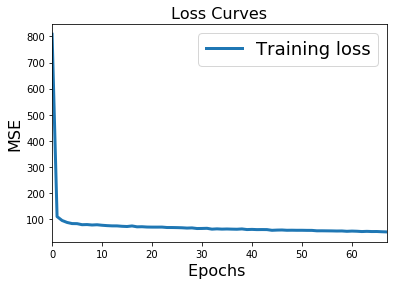

In [109]:
plt.figure(figsize=[8,6])
#ax = plt.gca()
hist.plot(x='epoch', y='mse', linewidth=3.0)
#hist.plot(x='epoch', y='mae',color='r', linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

<Figure size 576x432 with 0 Axes>

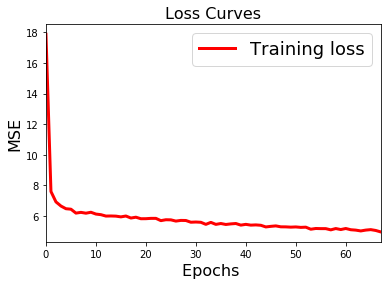

In [110]:
plt.figure(figsize=[8,6])
#ax = plt.gca()
#hist.plot(x='epoch', y='mse', linewidth=3.0)
hist.plot(x='epoch', y='mae',color='r', linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

My loss curves shows that the model is continuing to converge as the number of epochs increase, but be careful of over-fitting....

### Predictions vs. Actual
Work until these lines show very little disparity...

<Figure size 720x576 with 0 Axes>

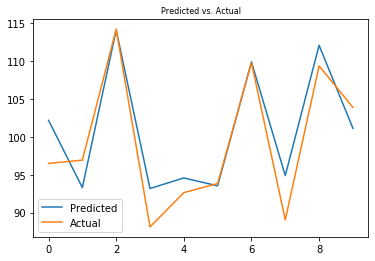

In [122]:
plt.figure(figsize=[10,8])
ax = plt.subplots()
plt.plot(y_hat)
plt.plot(array_y_batch)

plt.legend(['Predicted','Actual' ],fontsize=10)

plt.title('Predicted vs. Actual',fontsize=8)

plt.show()

The above graph shows that my predicted values match the ground truth reasonably well. I will continue to adjust my model until I get around 90% accuracy or a much lower MSE.